# Data Scientist Associate Case Study

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [2]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 
import pandas as pd
data = pd.read_csv("data/fitness_class.csv")
data.head(6)

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7
5,Tue,PM,HIIT,15,4,7,28.7,4,7


In [3]:
data.isnull().sum()

day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64

### day_of_week

In [4]:
data.day_of_week.unique()

array(['Wed', 'Sun', 'Mon', 'Tue', 'Thu', 'Sat', 'Fri'], dtype=object)

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

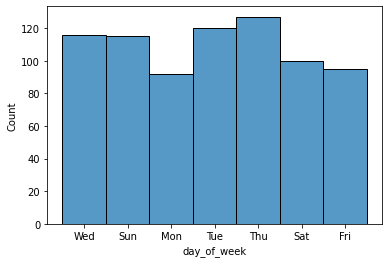

In [15]:
import seaborn as sns
sns.histplot(data, x ='day_of_week', discrete=True)

### time

In [5]:
data.time.unique()

array(['AM', 'PM'], dtype=object)

<AxesSubplot:xlabel='time', ylabel='Count'>

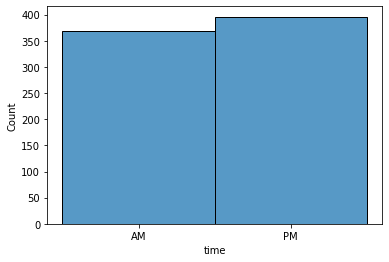

In [16]:
sns.histplot(data, x ='time', discrete=True)

### class_category    

In [11]:
data.class_category.unique()

array(['Yoga', 'Aqua', 'Strength', 'HIIT', 'Cycling'], dtype=object)

<AxesSubplot:xlabel='class_category', ylabel='Count'>

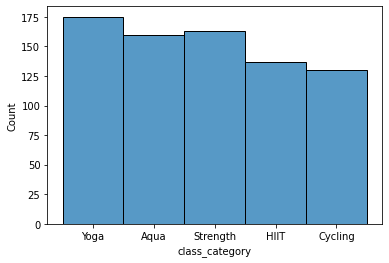

In [17]:
sns.histplot(data, x ='class_category', discrete=True)

### class_capacity    

In [36]:
data.class_capacity.unique()

array([15, 25])

In [31]:
data.replace({'class_capacity':{26:25}}, inplace = True)

<AxesSubplot:xlabel='class_capacity', ylabel='Count'>

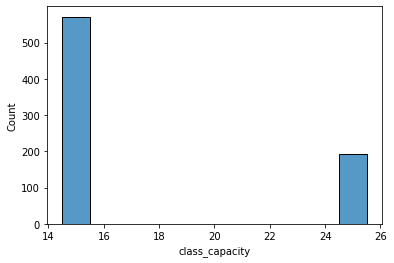

In [37]:
sns.histplot(data, x ='class_capacity', discrete=True)

### days_before  

In [9]:
data.days_before.unique()

array([1, 3, 5, 4, 2])

<AxesSubplot:xlabel='days_before', ylabel='Count'>

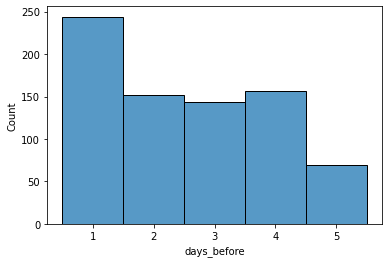

In [19]:
sns.histplot(data, x ='days_before', discrete=True)

### attendance        

In [21]:
data.attendance.unique()

array([ 8, 10, 18,  7, 15, 20,  5, 12,  9,  6, 19, 13, 11,  4, 16, 14, 21,
       17])

<AxesSubplot:xlabel='attendance', ylabel='Count'>

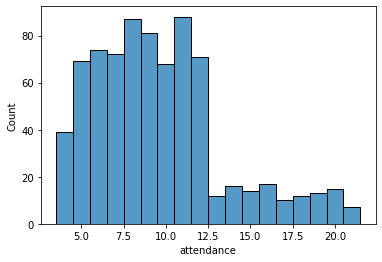

In [22]:
sns.histplot(data, x ='attendance', discrete=True)

In [39]:
data.attendance.describe()

count    765.000000
mean       9.563399
std        3.896598
min        4.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       21.000000
Name: attendance, dtype: float64

### age               

In [8]:
data.age.unique()

array([31.1, 27. , 22.4, 23.5, 29.8, 28.7, 32.5, 36. , 15.3, 31.3, 23.8,
       30.3, 29.2, 21.8, 34.7, 34.4, 30.9, 38.9, 18.7, 32.8, 29.7, 30.6,
       30. , 34. , 32.3, 31.6, 32. , 24.5, 24.6, 34.1, 21.6, 33.8, 27.2,
       17.7, 33. , 24.7, 40.2, 23.1, 35.2, 27.3, 25.8, 14.8, 33.5, 31.9,
       21. , 16.4, 27.8, 26.6, 31.7, 39.1,  8.3, 28.1, 26.2, 19.9, 28.6,
       30.8, 23. , 31.8, 32.2, 37.3, 34.2, 35.7, 34.6, 39.3, 35.8, 27.5,
       40.1, 20.9, 28.2, 26.1, 20.5, 21.5, 24.3, 40.4, 19.6, 32.9, 26.5,
       14. , 30.5, 22. , 26.4, 31. , 22.5, 21.4, 40.7, 33.7, 28. , 29. ,
       13.6, 22.7, 27.4, 25.2, 33.3, 25. , 25.6, 31.5, 30.7, 25.3, 17.5,
       29.4, 22.6, 39. , 25.1, 32.4, 37.5, 44. , 36.2, 24.2, 26.3, 20. ,
       36.6, 18. , 25.4, 28.3, 35.1, 43.7, 35. , 40.6, 35.4, 25.9, 26. ,
       24. , 19.5, 11.3, 27.9, 26.7, 34.3, 31.2, 15.9, 28.5, 24.8, 37.6,
       17.2, 26.8, 29.3, 37.1, 22.1, 41.1, 16.3, 18.1, 28.8, 27.6, 21.3,
       42.4, 25.5, 20.7, 28.4, 24.1, 29.9, 25.7, 31

In [40]:
data = data[data.age >= 14 ]

<AxesSubplot:xlabel='age', ylabel='Count'>

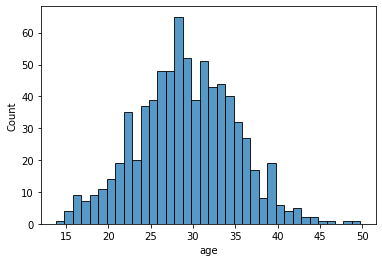

In [41]:
sns.histplot(data, x ='age', discrete=True)

In [42]:
data.age.describe()

count    761.000000
mean      29.183574
std        5.790269
min       14.300000
25%       25.300000
50%       29.000000
75%       33.200000
max       48.800000
Name: age, dtype: float64

### new_students      

In [7]:
data.new_students.unique()

array([ 6,  7,  8,  5,  4,  3,  2,  9, 10, 11,  1])

<AxesSubplot:xlabel='new_students', ylabel='Count'>

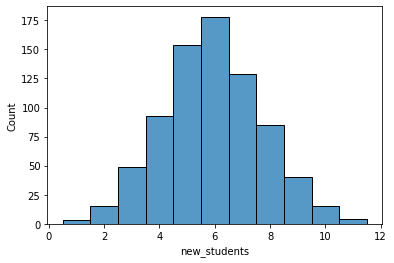

In [24]:
sns.histplot(data, x ='new_students', discrete=True)

In [43]:
data.new_students.describe()

count    761.000000
mean       5.913272
std        1.789691
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       11.000000
Name: new_students, dtype: float64

### over_6_month      

In [6]:
data.over_6_month.unique()

array([ 4,  8,  7,  9, 11,  6,  5,  3, 12, 10, 13,  2])

<AxesSubplot:xlabel='over_6_month', ylabel='Count'>

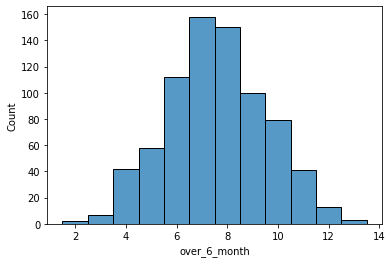

In [28]:
sns.histplot(data, x ='over_6_month', discrete=True)

In [44]:
data.over_6_month.describe()

count    761.000000
mean       7.563732
std        1.969223
min        2.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       13.000000
Name: over_6_month, dtype: float64

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here*

In [2]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*

In [3]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*

In [4]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study